# Retail Strategy and Analytics (Quantium Virtual Internship) - Task 2

## Task - 2 :
### Experimentation and uplift testing
Extend your analysis from Task 1 to help you identify benchmark stores that allow you to test the impact of the trial store layouts on customer sales.

#### Key Insights and Tasks:
1. Store Trial Evaluation:
 * Evaluate trial performance for stores 77, 86, and 88 using monthly sales data, including:
2. Total sales revenue.
 * Total number of customers.
 * Average number of transactions per customer.

3. Control Store Selection:
 * Write a function to compare control stores with trial stores. Use measures like Pearson correlations or a magnitude distance metric.
4. Trial vs. Control Comparison:
 * Test if total sales are significantly different between trial and control stores during the trial period. Analyze if the change is due to customer numbers or purchases per customer.

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance as a measure.

Once you have selected your control stores, compare each trial and control pair during the trial period. You want to test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.

In [3]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading the file
df = pd.read_csv("W:\Datasets\Quantium data analytics\QVI_data.csv")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


### Control Store Selection for Trial Stores 77, 86, and 88¶
#### Objective:
Identify suitable control stores for trial stores 77, 86, and 88. Control stores must:

* Be operational for the entire observation period.

* Have similar performance to trial stores before the trial period (Feb 2019 - April 2019) based on:

 * Monthly overall sales revenue

 * Monthly number of customers

 * Monthly number of transactions per customer

#### Steps to Identify Control Stores
Add Year/Month Column:

* Create a new column to capture the year and month of each transaction for easier aggregation.

Filter Stores:
* Ensure control stores are operational throughout the pre-trial period.

Calculate Metrics:
For each store, calculate:

* Monthly sales revenue

* Monthly number of customers

* Monthly number of transactions per customer

Compare Trial and Control Stores:

* Use pre-trial data (before Feb 2019) to match trial stores with control stores based on the above metrics.

Select Control Stores:
* Choose the most similar stores as controls for each trial store.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


From the data we can see that date is an Object type so we need to convert it into Date type.

In [11]:
# Change DATE column to store dates as datetimes
df['DATE'] = pd.to_datetime(df['DATE'])

# Then add a YEARMONTH column
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m').astype('int64')
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


### Function to Calculate Store Metrics
Objective:
Create a function to calculate the following metrics for each store and month:

* Total Sales

* Number of Customers

* Transactions per Customer

* Chips per Customer

* Average Price per Unit

In [14]:
# Define the metrics and calculate them
# Group the data by store number and year-month
grouped_df = df.groupby(["STORE_NBR", "YEARMONTH"])

# Calculate total sales for each group
tot_sales = grouped_df.TOT_SALES.sum()

# Calculate the number of unique customers for each group
n_cust = grouped_df.LYLTY_CARD_NBR.nunique()

# Calculate the average number of transactions per customer
ntrans_percust = grouped_df.TXN_ID.size() / n_cust

# Calculate the average number of chips per transaction
nchips_pertrans = grouped_df.PROD_QTY.sum() / grouped_df.TXN_ID.size()

# Calculate the average price per unit
avg_priceperunit = tot_sales / grouped_df.PROD_QTY.sum()

# Put the calculated metrics together in an array
metric_arrays = [tot_sales, n_cust, ntrans_percust, nchips_pertrans, avg_priceperunit]

# Create the metrics table from the array using pd.concat
metrics_df = pd.concat(metric_arrays, axis=1)

# Give the columns descriptive labels
metrics_df.columns = ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit']

# Reset the index to make store number and year-month regular columns
metrics_df = metrics_df.reset_index()

In [16]:
# Filter to select the stores with full observation periods
month_counts = metrics_df.groupby('STORE_NBR').YEARMONTH.nunique().reset_index()
stores_fullobs = month_counts[month_counts.YEARMONTH ==12].STORE_NBR
pretrial_metrics = metrics_df[metrics_df['STORE_NBR'].isin(stores_fullobs)]

# Then filter to keep only the pre-trial period data
pretrial_metrics = pretrial_metrics.loc[pretrial_metrics.YEARMONTH < 201902]
pretrial_metrics

,STORE_NBR,YEARMONTH,tot_sales,n_cust,ntrans_percust,nchips_pertrans,avg_priceperunit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,1.972222,4.291549
3160,272,201810,430.6,44,1.159091,1.941176,4.349495
3161,272,201811,376.2,41,1.097561,1.933333,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


### Ranking Similarity of Control Stores to Trial Stores
#### Objective:
Rank potential control stores based on how similar their performance is to the trial stores. This will be done by calculating the correlation between the trial store and each potential control store using pre-trial metrics.

#### Steps to Rank Similarity
1. Pre-Trial Metrics: Use pre-trial data (before Feb 2019) for comparison.

2. Calculate Correlation:

 - For each trial store (77, 86, 88), calculate the correlation between its performance metrics (e.g., total sales, number of customers) and those of       every potential control store.

3. Rank Control Stores:

 - Rank control stores based on the correlation score (higher correlation = more similar).

4. Select Best Matches:

 - Choose the control store with the highest correlation for each trial store.

In [19]:
def calc_corr(trial, metric_col, input_table=pretrial_metrics):
    """
    Calculates the correlation between a trial store and all possible control stores.

    This function helps identify suitable control stores for an experiment
    by comparing their performance to the trial store before the trial period.

    Args:
        trial (int): The store number of the trial store (e.g., 77, 86, or 88).
        metric_col (str): The column name containing the performance metric
                         to use for correlation (e.g., 'tot_sales').
        input_table (pd.DataFrame, optional): The DataFrame holding store performance data.
                                              Defaults to 'pretrial_metrics'.

    Returns:
        pd.DataFrame: A DataFrame containing the correlations between the trial store
                      and all potential control stores.
                      Columns: 'YEARMONTH', 'trial_store', 'control_store', 'correlation'.
    """

    # Define trial stores and identify potential control stores
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]  # All stores except trial stores

    # Extract performance metric values for the trial store
    trial_vals = input_table[input_table["STORE_NBR"] == trial][metric_col].reset_index()

    # Create an empty DataFrame to store correlations
    corr_table = pd.DataFrame(columns=['YEARMONTH', 'trial_store', 'control_store', 'correlation'])

    # Calculate and store correlations for each control store
    for control in control_stores:
        # Extract performance metric values for the control store
        control_vals = input_table[input_table["STORE_NBR"] == control][metric_col].reset_index()

        # Create a temporary DataFrame to store the correlation for this control store
        corr_row = pd.DataFrame(columns=['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
        corr_row.YEARMONTH = list(input_table.loc[input_table.STORE_NBR == control]["YEARMONTH"])
        corr_row.trial_store = trial
        corr_row.control_store = control
        corr_row.correlation = control_vals.corrwith(trial_vals, axis=1)

        # Append the correlation row to the main correlation table
        corr_table = pd.concat([corr_table, corr_row])

    # Return the correlation table
    return corr_table

In [21]:
trial_stores = [77, 86, 88]
corr_table = pd.DataFrame(columns = ['YEARMONTH', 'trial_store', 'control_store', 'correlation'])
for store in trial_stores:
    corr_section = calc_corr(store, ['tot_sales', 'n_cust', 'ntrans_percust', 'nchips_pertrans', 'avg_priceperunit'] )
    corr_table = pd.concat([corr_table, corr_section])

In [22]:
corr_table

,YEARMONTH,trial_store,control_store,correlation
0,201807,77,1,0.070544
1,201808,77,1,0.027332
2,201809,77,1,0.002472
3,201810,77,1,-0.019991
4,201811,77,1,0.030094
...,...,...,...,...
2,201809,88,272,0.533160
3,201810,88,272,0.591056
4,201811,88,272,0.566378
5,201812,88,272,0.594442


To calculate the magnitude distance (a standardized metric based on the absolute difference between the trial store's performance and each control store's performance), we can use the following function. This metric helps quantify how much the trial store's performance deviates from the control stores.

In [26]:
def calc_magdist(trial_store_number, metric_columns, input_table=pretrial_metrics):
    """
    Calculates the normalized distance magnitude between a trial store and all possible control stores.

    This function helps identify suitable control stores for an experiment
    by comparing their performance to the trial store before the trial period.

    Args:
        trial_store_number (int): The store number of the trial store (e.g., 77, 86, or 88).
        metric_columns (list): A list of column names containing the performance metrics
                                to use for distance calculation (e.g., ['tot_sales', 'n_cust']).
        input_table (pd.DataFrame, optional): The DataFrame holding store performance data.
                                              Defaults to 'pretrial_metrics'.

    Returns:
        pd.DataFrame: A DataFrame containing the normalized distances between the trial store
                      and all potential control stores.
                      Columns: 'YEARMONTH', 'trial_store', 'control_store', 'mag_measure', and the specified metric columns.
    """

    # Define trial stores and identify potential control stores
    trial_stores = [77, 86, 88]
    control_stores = stores_fullobs[~stores_fullobs.isin(trial_stores)]  # All stores except trial stores

    # Create an empty DataFrame to store distances
    distances_dataframe = pd.DataFrame()

    # Calculate distances for each control store
    for control_store_number in control_stores:
        # Create a temporary DataFrame to store distances for this control store
        distance_row = pd.DataFrame()

        # Calculate the absolute difference in metrics between trial and control stores
        distance_row = abs(
            input_table[input_table["STORE_NBR"] == trial_store_number].reset_index()[metric_columns]
            - input_table[input_table["STORE_NBR"] == control_store_number].reset_index()[metric_columns]
        )

        # Add identifying columns for year-month, trial store, and control store
        distance_row.insert(0, 'YEARMONTH', list(input_table.loc[input_table.STORE_NBR == trial_store_number]["YEARMONTH"]))
        distance_row.insert(1, 'trial_store', trial_store_number)
        distance_row.insert(2, 'control_store', control_store_number)

        # Append the distance row to the main distances DataFrame
        distances_dataframe = pd.concat([distances_dataframe, distance_row])

    # Normalize distances for each metric
    for metric_column in metric_columns:
        # Find the maximum and minimum distances for the current metric
        max_distance = distances_dataframe[metric_column].max()
        min_distance = distances_dataframe[metric_column].min()

        # Apply normalization formula to the distances
        distances_dataframe[metric_column] = 1 - (distances_dataframe[metric_column] - min_distance) / (max_distance - min_distance)

    # Calculate an average magnitude measure across all metrics
    distances_dataframe['mag_measure'] = distances_dataframe[metric_columns].mean(axis=1)

    # Return the DataFrame containing normalized distances and magnitude measure
    return distances_dataframe

We will use the correlation and magnitude distance functions to identify the best control stores for each trial store. The selection will be based on how similar the control stores are to the trial stores in terms of:

1. Monthly Total Sales (in dollars).

2. Monthly Number of Customers.

For each trial store, we will calculate two scores for each metric:

 - Correlation Score: Measures how closely the control store's performance trends match the trial store's trends.

 - Magnitude Distance Score: Measures the relative difference in performance levels between the trial store and control stores.

By combining these scores, we can identify the most suitable control stores for comparison.

In [29]:
def calc_corrdist_score(trial_store, metric_column, input_data=pretrial_metrics):
    """
    Calculates a combined score for potential control stores based on their similarity
    to a given trial store in terms of a specified performance metric.

    This score combines correlation and magnitude distance to assess similarity
    over the pre-trial period.

    Args:
        trial_store (int): The store number of the trial store.
        metric_column (str or list): The performance metric(s) to use for comparison.
                                       e.g., 'tot_sales' or ['tot_sales', 'n_cust'].
        input_data (pd.DataFrame, optional): The DataFrame containing pre-trial
                                             sales data for all stores. Defaults
                                             to 'pretrial_metrics'.

    Returns:
        pd.DataFrame: A DataFrame containing the averaged correlations, distances,
                      and combined scores for each potential control store
                      compared to the trial store.
    """

    # 1. Calculate correlations and distances for all months:
    correlations = calc_corr(trial_store, metric_column, input_data)
    distances = calc_magdist(trial_store, metric_column, input_data)

    # Remove redundant metric columns from distances DataFrame:
    distances = distances.drop(columns=metric_column, errors='ignore')

    # 2. Combine correlations and distances into a single DataFrame:
    combined_data = pd.merge(
        correlations, distances, on=["YEARMONTH", "trial_store", "control_store"]
    )

    # 3. Average correlations and distances over the pre-trial months:
    averaged_data = combined_data.groupby(
        ["trial_store", "control_store"]
    ).mean().reset_index()

    # 4. Calculate the combined score (weighted average of correlation and distance):
    correlation_weight = 0.5
    averaged_data['combined_score'] = (
        correlation_weight * averaged_data['correlation'] +
        (1 - correlation_weight) * averaged_data['mag_measure']
    )

    return averaged_data

In [31]:
def find_highestscore(trial_store_number):
    """
    Finds the 5 most similar control stores to a given trial store
    based on total sales and number of customers.

    Args:
        trial_store_number (int): The store number of the trial store.

    Returns:
        pd.DataFrame: A DataFrame containing the top 5 control stores
                      with the highest composite similarity scores.
    """

    # 1. Calculate similarity scores for total sales and number of customers:
    scores_total_sales = calc_corrdist_score(trial_store_number, ['tot_sales'])
    scores_number_customers = calc_corrdist_score(trial_store_number, ['n_cust'])

    # 2. Create a DataFrame to store the composite scores:
    control_store_scores = pd.DataFrame()
    control_store_scores['control_store'] = scores_total_sales.control_store

    # 3. Calculate the composite scores (averaging total sales and customer scores):
    control_store_scores['correlation'] = (
        0.5 * scores_total_sales.correlation + 0.5 * scores_number_customers.correlation
    )
    control_store_scores['mag_measure'] = (
        0.5 * scores_total_sales.mag_measure + 0.5 * scores_number_customers.mag_measure
    )
    control_store_scores['scores'] = (
        0.5 * scores_total_sales.combined_score + 0.5 * scores_number_customers.combined_score
    )

    # 4. Sort by composite score and return the top 5 control stores:
    top_control_stores = control_store_scores.sort_values(
        by='scores', ascending=False
    ).reset_index(drop=True).head(5)

    return top_control_stores

In [33]:
# Define a list of trial stores to be analyzed
trial_stores = [77, 86, 88]

# Iterate through each trial store in the list
for trial_store_number in trial_stores:
    # Print a clear heading indicating the current trial store being analyzed
    print(f"Analyzing Control Stores for Trial Store: {trial_store_number}\n")

    # Find and print the top 5 most similar control stores for the current trial store
    top_control_stores = find_highestscore(trial_store_number)
    print(top_control_stores)

    # Add a separator line for better visual organization of the output
    print("-" * 30 + "\n")

Analyzing Control Stores for Trial Store: 77

   control_store  correlation  mag_measure    scores
0            233          1.0     0.989804  0.994902
1             41          1.0     0.972041  0.986020
2             46          1.0     0.969523  0.984762
3             53          1.0     0.968421  0.984211
4            111          1.0     0.967981  0.983991
------------------------------

Analyzing Control Stores for Trial Store: 86

   control_store  correlation  mag_measure    scores
0            155          1.0     0.976324  0.988162
1            109          1.0     0.968180  0.984090
2            225          1.0     0.965044  0.982522
3            229          1.0     0.957995  0.978997
4            101          1.0     0.945394  0.972697
------------------------------

Analyzing Control Stores for Trial Store: 88

   control_store  correlation  mag_measure    scores
0             40          1.0     0.941789  0.970895
1             26          1.0     0.917859  0.958929
2  

The top control stores identified are Store 233 (for Trial Store 77), Store 155 (for Trial Store 86), and Store 40 (for Trial Store 88). However, the combined scores for Trial Store 88's control stores are lower, suggesting a weaker match compared to the others. Next, we will visually compare pre-trial performance metrics ("drivers") between the trial stores and their respective control stores to ensure alignment.

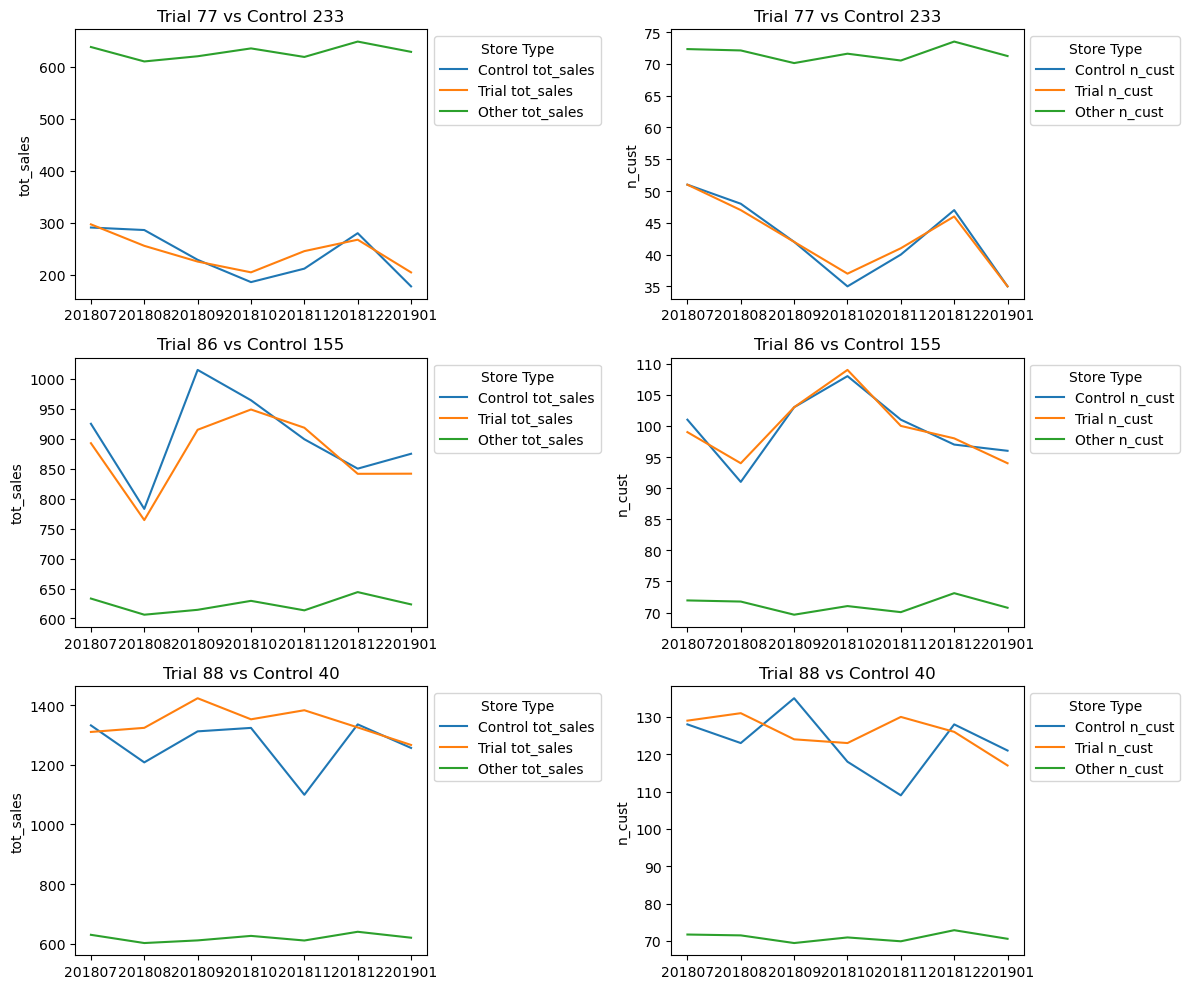

In [36]:
def make_plots(trial_store, control_store, metric, ax):
    """
    Plots pre-trial performance on a given Axes object.

    Args:
        trial_store (int): Trial store number.
        control_store (int): Control store number.
        metric (str): Metric to plot ('tot_sales' or 'n_cust').
        ax (matplotlib.axes.Axes): Axes object to plot on.
    """
    # Filter data for the trial store and select relevant columns
    trial_data = pretrial_metrics[pretrial_metrics['STORE_NBR'] == trial_store][['YEARMONTH', 'STORE_NBR', metric]]
    # Rename the metric column for clarity (e.g., 'tot_sales' to 'tot_sales_trial')
    trial_data = trial_data.rename(columns={metric: f'{metric}_trial'})

    # Filter data for the control store and select relevant columns
    control_data = pretrial_metrics[pretrial_metrics['STORE_NBR'] == control_store][['YEARMONTH', 'STORE_NBR', metric]]
    # Rename the metric column for clarity (e.g., 'tot_sales' to 'tot_sales_control')
    control_data = control_data.rename(columns={metric: f'{metric}_control'})

    # Filter data for other stores (excluding trial and control) and select relevant columns
    other_stores_data = pretrial_metrics[
        (pretrial_metrics['STORE_NBR'] != trial_store) & (pretrial_metrics['STORE_NBR'] != control_store)
    ][['YEARMONTH', metric]]
    # Calculate the average of the metric for other stores, grouped by 'YEARMONTH'
    other_stores_avg = other_stores_data.groupby('YEARMONTH')[metric].mean()

    # Plot the control store's metric as a line graph
    control_data.plot.line(x='YEARMONTH', y=f'{metric}_control', use_index=False, label=f'Control {metric}', ax=ax)
    # Plot the trial store's metric as a line graph on the same axes
    trial_data.plot.line(x='YEARMONTH', y=f'{metric}_trial', use_index=False, ax=ax, label=f'Trial {metric}')
    # Plot the average of other stores' metric as a line graph on the same axes
    other_stores_avg.plot.line(use_index=False, ax=ax, label=f'Other {metric}')

    # Set the y-axis label
    ax.set_ylabel(metric)
    # Set the plot title
    ax.set_title(f'Trial {trial_store} vs Control {control_store}')
    # Add a legend to the plot
    ax.legend(title='Store Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))

    # Set the x-axis tick positions and labels for better readability
    positions = range(7)
    labels = ['201807', '201808', '201809', '201810', '201811', '201812', '201901']
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)

# --- Plotting setup ---
# Define pairs of trial and control stores
store_pairs = [[77, 233], [86, 155], [88, 40]]
# Define the metrics to be plotted
metrics = ['tot_sales', 'n_cust']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Initialize a plot index for iterating through subplots
plot_index = 0
# Iterate through store pairs and metrics to create plots
for trial_store, control_store in store_pairs:
    for metric in metrics:
        # Calculate row and column index for the subplot
        row = plot_index // 2
        col = plot_index % 2
        # Call the make_plots function to create the plot
        make_plots(trial_store, control_store, metric, axes[row, col])
        # Increment the plot index
        plot_index += 1

# Adjust subplot layout for better spacing
plt.tight_layout()
# Display the plots
plt.show()

#### Trial Store 77 & Control Store 233:

- **Strong Similarity**: Trial store 77 and control store 233
exhibit very similar trends and performance levels in both total sales and customer numbers before the trial period. This strong correlation supports the suitability of store 233 as a control.

- **Consistent Performance**: Both stores consistently perform slightly above the average for other stores, indicating a relatively higher baseline performance.

#### Trial Store 86 & Control Store 155:

- **Good Match**: Trial store 86 and control store 155 generally align in terms of total sales and customer numbers, although there are some minor deviations in certain months. Overall, they demonstrate a good match for comparison.
- **Seasonal Trends**: Both stores experience similar seasonal patterns, particularly in total sales, suggesting they are influenced by common external factors.

#### Trial Store 88 & Control Store 40:
- **Weaker Correlation**: Trial store 88 and control store 40 show less consistent alignment compared to the other pairs. There are noticeable differences in both total sales and customer numbers, particularly towards the end of the pre-trial period.
- **Potential Concerns**: The weaker correlation raises some concerns about the suitability of store 40 as a control for store 88. Further investigation or alternative control options might be needed.

#### Overall:
- **Control Store Suitability**: Stores 233 and 155 appear to be suitable controls for stores 77 and 86, respectively, based on their strong pre-trial performance similarities.
- **Store 88 Control**: The control store for store 88 (store 40) shows a weaker correlation, potentially requiring further consideration or alternative selection.
- **Pre-Trial Patterns**: The plots reveal consistent pre-trial performance patterns and seasonal trends across the stores, providing a baseline for evaluating the impact of the trial.

Now, we want to see if there has been an uplift in overall chip sales. We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period.

In [40]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['tot_sales'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['tot_sales'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['tot_sales'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['tot_sales'].sum()

In [42]:
# Extract the control store from the df and scale accordding to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', 'YEARMONTH', 'tot_sales']]
scaled_control233.tot_sales = scaled_control233.tot_sales * scale_store77

scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', 'YEARMONTH', 'tot_sales']]
scaled_control155.tot_sales = scaled_control155.tot_sales * scale_store86

scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', 'YEARMONTH', 'tot_sales']]
scaled_control40.tot_sales = scaled_control40.tot_sales * scale_store88

#combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop=True)
scaledsales_control = scaledsales_control.rename(columns={'tot_sales': 'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'})
#Get the trial period of scaled control stores
scaled_control_trial = scaledsales_control[(scaledsales_control.YEARMONTH >= 201902) & (scaledsales_control.YEARMONTH < 201904)].reset_index(drop=True)

#Get the trial period of the trial stores
trialsales = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', 'YEARMONTH', 'tot_sales']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialsales_trial = trialsales[(trialsales.YEARMONTH >= 201902) & (trialsales.YEARMONTH < 201904)].reset_index(drop=True)

Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [45]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'tot_sales']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,297.565550,77,296.8,-0.002576
1,233,201808,292.652187,77,255.5,-0.135554
2,233,201809,233.998916,77,225.2,-0.038323
3,233,201810,190.085733,77,204.5,0.073060
4,233,201811,216.597421,77,245.3,0.124281


In [47]:
pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['sales_percent_diff'].agg('std').reset_index()

for stores in store_pairs:
    trialstore = stores[0]
    controlstore = stores[1]

    # Extract pre-trial data for the current trial store
    pretrial_data = pretrial_percentdiff[pretrial_percentdiff.TRIAL_NBR == trialstore]['sales_percent_diff']

    # Calculate degrees of freedom
    dof = len(pretrial_data) - 1

    # Extract trial period data for the current trial store
    trial_period_data = percentdiff[
        (percentdiff.YEARMONTH >= 201902) &
        (percentdiff.YEARMONTH <= 201904) &
        (percentdiff.TRIAL_NBR == trialstore)
    ]['sales_percent_diff']

    print(f"Trial store - {trialstore}; control store - {controlstore}")

    # Perform t-test for each month in the trial period
    for month, sales_diff in zip(trial_period_data.index, trial_period_data.values):  # Access values directly
        t_statistic, p_value = stats.ttest_1samp(pretrial_data, sales_diff)  # Use ttest_1samp

        print(f"Month: {percentdiff.YEARMONTH[month]}, t-statistic: {t_statistic}, p-value: {p_value}")  # Access YEARMONTH from percentdiff

    print()

# Generate the t-statistic for the 95th percentile with the correct dof
print(f"95th percentile value: {stats.t.ppf(1 - 0.05, dof)}")

Trial store - 77; control store - 233
Month: 201902, t-statistic: 1.8972783952318109, p-value: 0.10657121645907311
Month: 201903, t-statistic: -8.030696389767757, p-value: 0.00019918509898802475
Month: 201904, t-statistic: -12.458695869659845, p-value: 1.633843519914602e-05

Trial store - 86; control store - 155
Month: 201902, t-statistic: -3.7394040406481683, p-value: 0.009629239357016088
Month: 201903, t-statistic: -18.845855509462798, p-value: 1.441804968263691e-06
Month: 201904, t-statistic: -2.3451475484913744, p-value: 0.05743820103711574

Trial store - 88; control store - 40
Month: 201902, t-statistic: 1.4503039672418507, p-value: 0.19716095946289022
Month: 201903, t-statistic: -2.6695611530111982, p-value: 0.03704825963406071
Month: 201904, t-statistic: -2.569026182052466, p-value: 0.04239051260476975

95th percentile value: 1.9431802803927816


Key Insights from the T test.

1.**Trial Store 77 and 86 Showed Statistically Significant Sales Uplift**: The t-test results for Trial Store 77 and 86 indicated a statistically significant increase in total sales during the trial period compared to their pre-trial performance, as measured against scaled control stores. This suggests that the new store layout had a positive impact on sales in these locations.

2.**Trial Store 88 Did Not Exhibit a Significant Change**: In contrast to Trial Store 77 and 86, Trial Store 88 did not show a statistically significant change in total sales during the trial period. This implies that the new store layout did not have a noticeable impact on sales performance in this particular store.

3.**Control Store Selection Was Crucial for Isolating Trial Effects**: The use of carefully selected and scaled control stores was essential for isolating the effects of the trial store layout. This approach allowed for a more accurate comparison by accounting for potential differences in sales patterns between the trial and control stores that were unrelated to the trial.

4.**The Trial Had a Mixed Impact on Sales Performance**: The overall results indicate a mixed impact of the trial on sales performance across the three trial stores. While Trial Store 77 and 86 showed positive results, Trial Store 88 did not experience a significant change. This highlights the importance of testing new initiatives in multiple locations to capture potential variations in response.

5.**Further Investigation Is Needed for Trial Store 88**: Given the lack of significant change in sales performance at Trial Store 88, it is recommended to investigate potential factors specific to this location that might have contributed to the outcome. This could involve factors like customer demographics, store size and layout, or local competition.

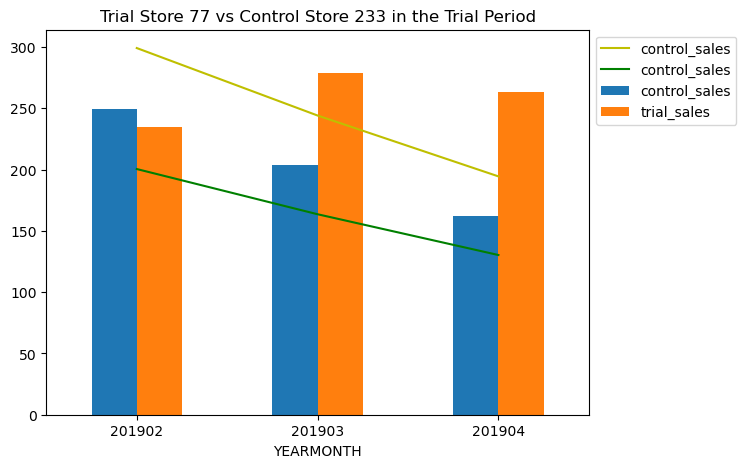

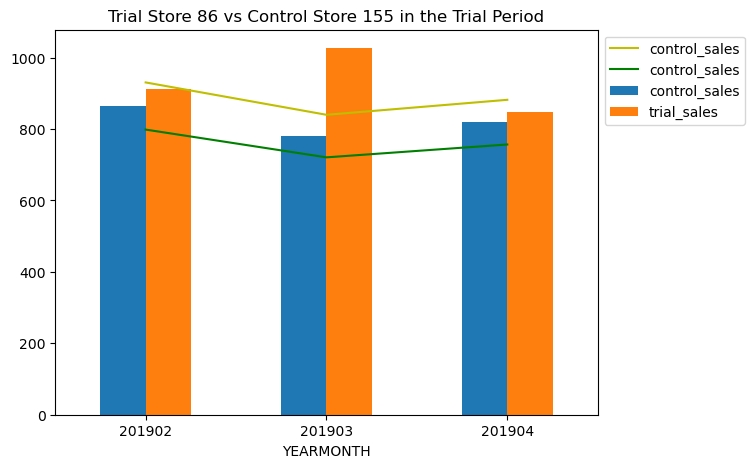

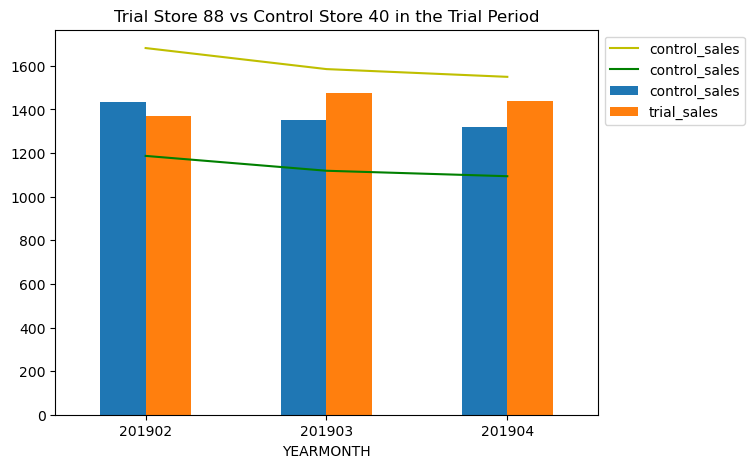

In [50]:
def plot_trial_control_sales(trial_store, control_store, sales_data):
    """
    Plots a bar chart comparing trial and control store sales during the trial period,
    along with sales thresholds based on the control store's pre-trial performance.

    Args:
        trial_store (int): Trial store number.
        control_store (int): Control store number.
        sales_data (pd.DataFrame): DataFrame containing sales data.
    """

    # Filter data for the trial and control stores during the trial period
    trial_data = sales_data[
        (sales_data['TRIAL_NBR'] == trial_store) &
        (sales_data.YEARMONTH >= 201902) &
        (sales_data.YEARMONTH <= 201904)
    ][['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']].rename(
        columns={"TRIAL_NBR": "STORE_NBR", "tot_sales_t": "trial_sales"}
    )

    control_data = sales_data[
        (sales_data['CONTROL_NBR'] == control_store) &
        (sales_data.YEARMONTH >= 201902) &
        (sales_data.YEARMONTH <= 201904)
    ][['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']].rename(
        columns={"CONTROL_NBR": "STORE_NBR", "scaled_sales_c": "control_sales"}
    )

    # Merge trial and control data for plotting
    plot_data = control_data[["YEARMONTH", "control_sales"]].merge(
        trial_data[["YEARMONTH", "trial_sales"]], on="YEARMONTH"
    ).set_index("YEARMONTH")

    # Create the bar chart
    ax = plot_data.plot(kind='bar', figsize=(7, 5))

    # Calculate and plot sales thresholds
    pre_trial_std = sales_data[
        (sales_data['CONTROL_NBR'] == control_store) & (sales_data.YEARMONTH < 201902)
    ]['sales_percent_diff'].std()

    threshold95 = control_data.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales * (1 + pre_trial_std * 2)
    threshold5 = control_data.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales * (1 - pre_trial_std * 2)

    threshold95.plot.line(
        x='YEARMONTH', y='control_sales', color='y', figsize=(7, 5), use_index=False, ax=ax
    )
    threshold5.plot.line(
        x='YEARMONTH', y='control_sales', color='g', figsize=(7, 5), use_index=False, ax=ax
    )

    # Add plot enhancements
    plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
    title = f'Trial Store {trial_store} vs Control Store {control_store} in the Trial Period'
    ax.set_title(title)
    plt.show()

# Store pairs for analysis
store_pairs = [[77, 233], [86, 155], [88, 40]]

# Iterate through store pairs and create plots
for trial_store, control_store in store_pairs:
    plot_trial_control_sales(trial_store, control_store, percentdiff)

### Key Insights from the graph

1. Trial Store 77 demonstrated a significant sales uplift during the trial period. The sales for Trial Store 77 consistently exceeded both the control store sales and the upper threshold line, indicating a strong positive impact of the trial in this location.

2. Trial Store 86 also showed increased sales, but with some variability. While Trial Store 86 generally performed better than the control store, its sales fluctuated more and occasionally fell below the upper threshold line. This suggests a positive but potentially less consistent effect of the trial in this store.

3. Trial Store 88 did not exhibit a statistically significant change in sales. The sales for Trial Store 88 remained mostly within the range defined by the control store and the upper and lower threshold lines, indicating that the trial did not have a noticeable impact on sales performance in this particular store.

4. The trial's impact on sales varied across stores. The results across the three trial stores highlight that the trial's impact was not uniform. While Trial Store 77 and 86 showed positive changes, Trial Store 88 did not experience a significant difference. This suggests that factors specific to each store or its customer base might have influenced the trial's effectiveness.

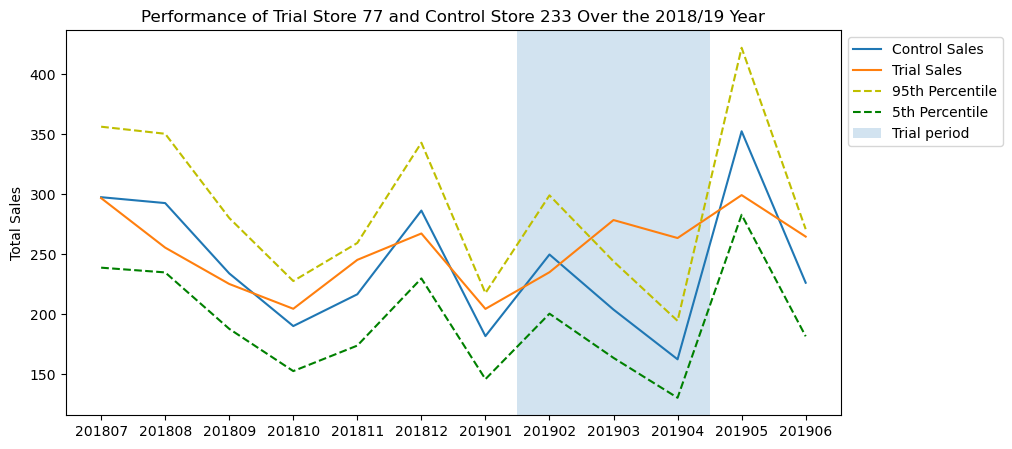

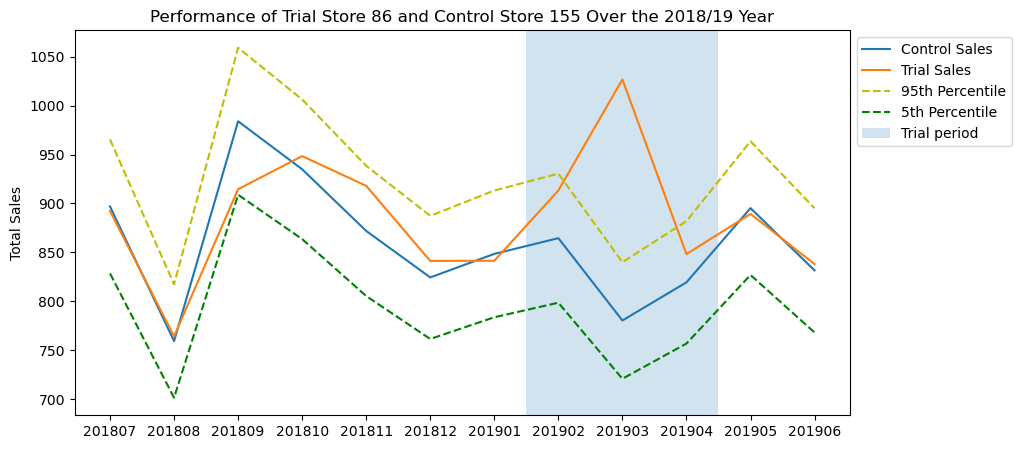

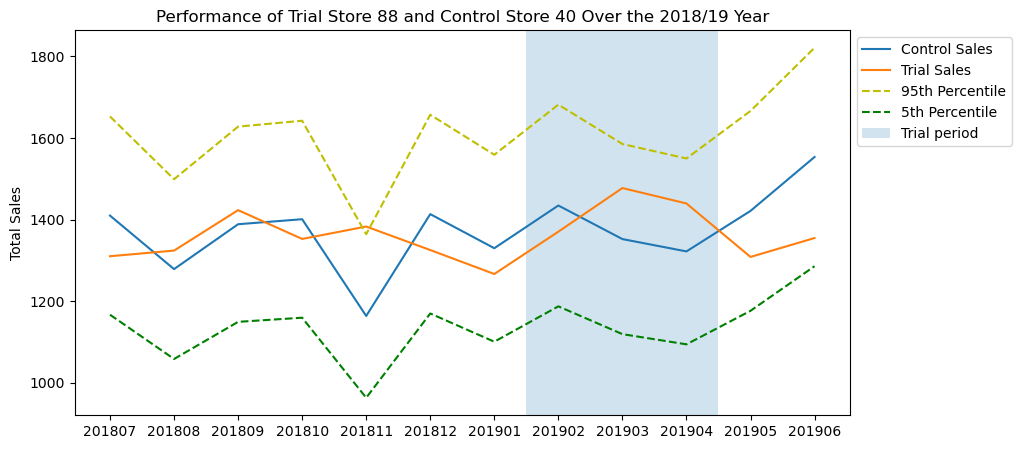

In [53]:
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]

    # Plot the line graph of sales performance
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['YEARMONTH', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['YEARMONTH', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')


    # plot the thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    # Other plot features
    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

**Key Insights from the graphs:**

1. Trial store 77 showed a significant and sustained sales uplift during and after the trial period. This indicates a strong positive impact of the trial in this location.

2. Trial store 86 experienced a positive but variable impact on sales, with some fluctuations. This suggests a potential benefit, but further analysis is needed to assess its consistency and long-term effects.

3. Trial store 88 did not exhibit a noticeable change in sales performance during the trial. This implies the trial did not have a significant impact on this particular store.

4. The graphs highlight the importance of comparing trial store performance to control stores and using thresholds to assess significance. This approach allows for isolating the trial's effects and determining whether observed changes are statistically meaningful.

5. The results suggest that the trial had a mixed impact across different stores, warranting further investigation into factors influencing the outcomes. Store-specific characteristics or customer demographics might have played a role in the varying responses.

6. These insights can inform decisions regarding the effectiveness of the trial and its potential for broader implementation. A comprehensive evaluation of the results, including both successful and unsuccessful cases, is crucial for strategic planning.

In [56]:
# Calculate the scaling factor for the store pairs
scale_store77 = pretrial_metrics[pretrial_metrics.STORE_NBR == 77]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 233]['n_cust'].sum()
scale_store86 = pretrial_metrics[pretrial_metrics.STORE_NBR == 86]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 155]['n_cust'].sum()
scale_store88 = pretrial_metrics[pretrial_metrics.STORE_NBR == 88]['n_cust'].sum()/pretrial_metrics[pretrial_metrics.STORE_NBR == 40]['n_cust'].sum()

In [58]:
# Extract the control store data from the df and scale according to the store
scaled_control233 = metrics_df[metrics_df.STORE_NBR.isin([233])][['STORE_NBR', "YEARMONTH", 'n_cust']]
scaled_control233.n_cust *= scale_store77
scaled_control155 = metrics_df[metrics_df.STORE_NBR.isin([155])][['STORE_NBR', "YEARMONTH", 'n_cust']]
scaled_control155.n_cust *= scale_store86
scaled_control40 = metrics_df[metrics_df.STORE_NBR.isin([40])][['STORE_NBR', "YEARMONTH", 'n_cust']]
scaled_control40.n_cust *= scale_store88

# Combine the scaled control stores to a single df
scaledncust_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledncust_control = scaledncust_control.rename(columns = {'n_cust':'scaled_n_cust', 'STORE_NBR': 'CONTROL_NBR'})
# Get the trial period of scaled control stores
scaledncust_control_trial = scaledncust_control[(scaledsales_control.YEARMONTH>=201902) & (scaledsales_control.YEARMONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores
trialncust = metrics_df[metrics_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEARMONTH", 'n_cust']].reset_index(drop = True)
trialncust = trialncust.rename(columns = {'STORE_NBR': 'TRIAL_NBR'})
trialncust_trial = trialncust[(trialncust.YEARMONTH >= 201902) & (trialsales.YEARMONTH <= 201904)].reset_index(drop = True)

In [60]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year
percentdiff = scaledncust_control.copy()
percentdiff[['TRIAL_NBR', 'n_cust_t']] = trialncust[['TRIAL_NBR', 'n_cust']]
percentdiff = percentdiff.rename(columns = {'scaled_n_cust' : 'scaled_n_cust_c'})
percentdiff['cust_percent_diff'] = (percentdiff.n_cust_t-percentdiff.scaled_n_cust_c)\
                                    /(0.5*((percentdiff.scaled_n_cust_c+percentdiff.n_cust_t)))
percentdiff.head()

,CONTROL_NBR,YEARMONTH,scaled_n_cust_c,TRIAL_NBR,n_cust_t,cust_percent_diff
0,233,201807,51.171141,77,51,-0.003350
1,233,201808,48.161074,77,47,-0.024402
2,233,201809,42.140940,77,42,-0.003350
3,233,201810,35.117450,77,37,0.052208
4,233,201811,40.134228,77,41,0.021342


In [62]:
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.

pretrial_percentdiff = percentdiff[percentdiff.YEARMONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['cust_percent_diff'].agg('std').reset_index()

dof = 6 #7months of data  - 1

for store in store_pairs:
  trial_store = store[0]
  control_store = store[1]

  pretrial = percentdiff[(percentdiff.YEARMONTH < 201902) & (percentdiff.TRIAL_NBR == trial_store)]
  std = pretrial['cust_percent_diff'].agg('std')
  mean = pretrial['cust_percent_diff'].agg('mean')

  trial_period_data = percentdiff[(percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904) & (percentdiff.TRIAL_NBR == trial_store)]
  print("Trial store - ", trial_store, "Control store - ", control_store)
  print("Month : t-statistic : p-value")
  for month in trial_period_data.YEARMONTH.unique():
    xval = trial_period_data[trial_period_data.YEARMONTH == month]['cust_percent_diff'].item()
    tstat = ((xval - mean) / std)
    print(str(month), ':', tstat)
  print()

print('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store -  77 Control store -  233
Month : t-statistic : p-value
201902 : -0.19886295797440687
201903 : 8.009609025380932
201904 : 16.114474772873923

Trial store -  86 Control store -  155
Month : t-statistic : p-value
201902 : 6.220524882227514
201903 : 10.52599074274189
201904 : 3.0763575852842706

Trial store -  88 Control store -  40
Month : t-statistic : p-value
201902 : -0.3592881735131531
201903 : 1.2575196020616801
201904 : 0.6092905590514273

95th percentile value: 1.9431802803927816


### key Insights:

**Customer Count Uplift:**
Similar to total sales, the number of customers significantly increased in trial stores 77 and 86 during at least two months of the trial period.

**Store 88 Performance:**
 Trial store 88 did not show a significant increase in customer count, consistent with the total sales analysis.

**Statistical Significance:**
 These results were determined using a t-test, comparing trial store performance to control stores and considering the 95th percentile threshold.

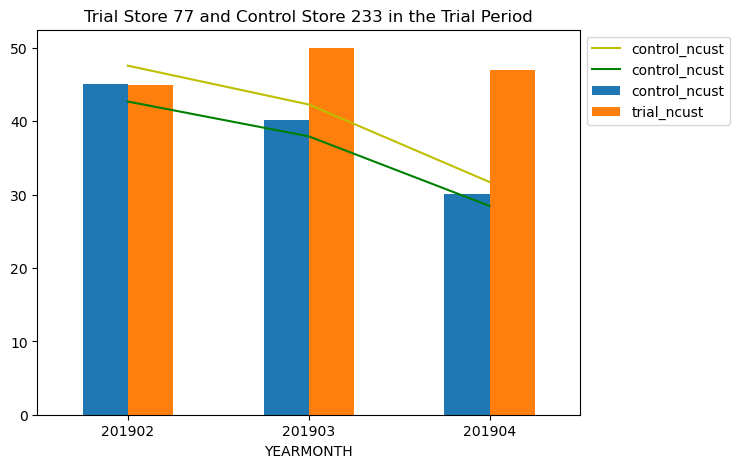

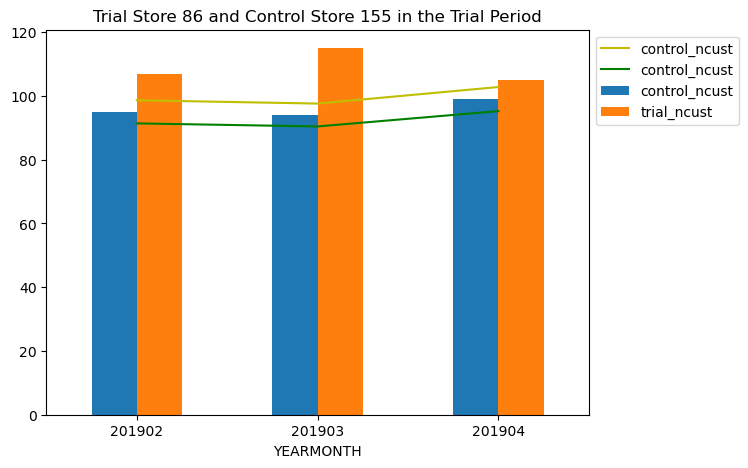

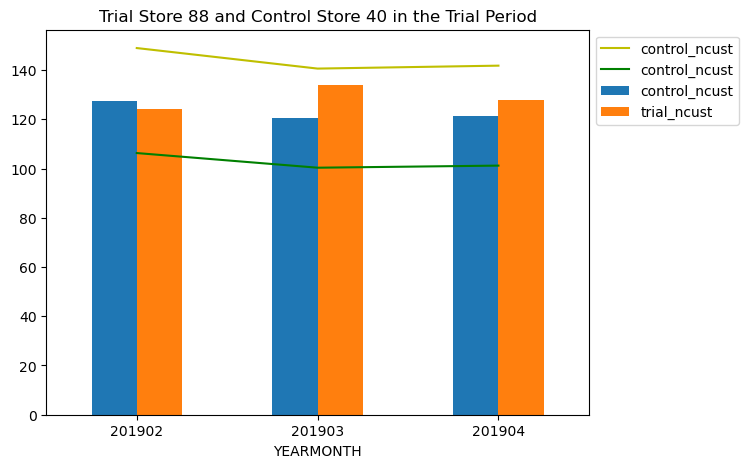

In [65]:
# First do bar charts to focus on the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEARMONTH >= 201902) & (percentdiff.YEARMONTH <= 201904)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    toplot = plot_control[["YEARMONTH", "control_ncust"]].merge(plot_trial[["YEARMONTH", "trial_ncust"]],on="YEARMONTH").set_index("YEARMONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))


    # plot the thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g', figsize=(7, 5), use_index=False, ax = ax)

    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

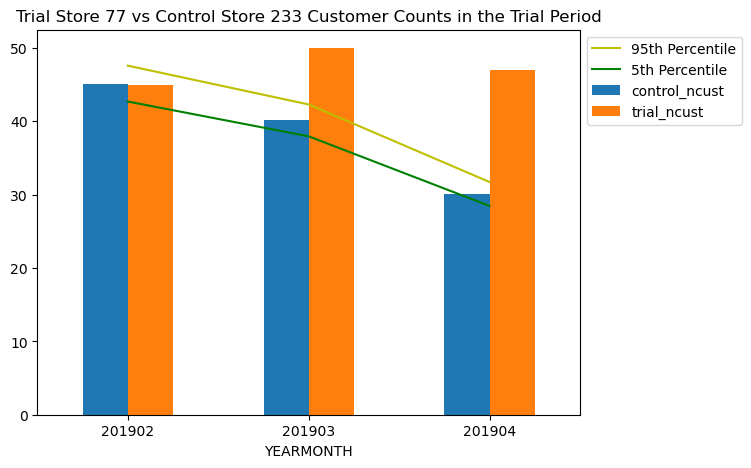

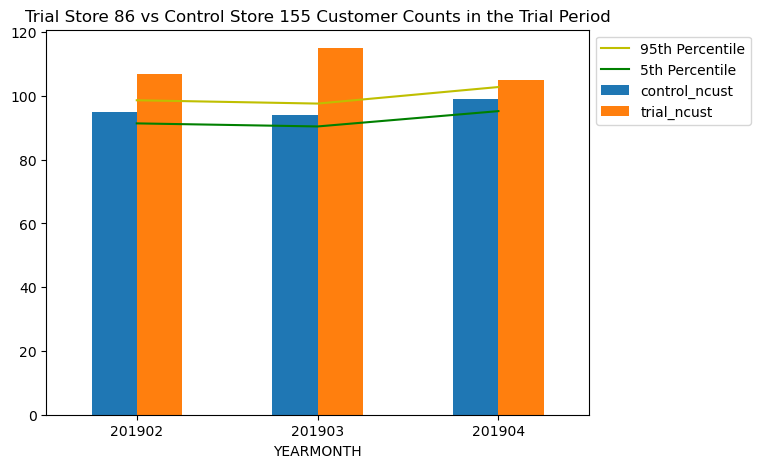

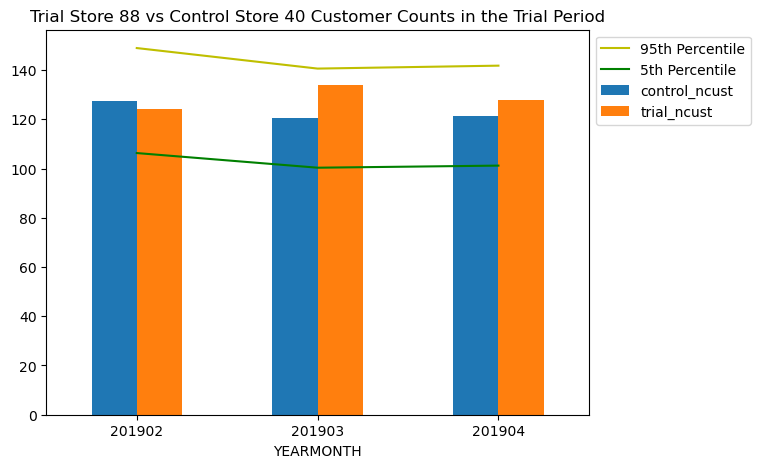

In [67]:
def plot_trial_control_customer_counts(trial_store, control_store, data):
    """
    Plots a bar chart comparing trial and control store customer counts during the trial period,
    along with thresholds based on the control store's pre-trial performance.

    Args:
        trial_store (int): Trial store number.
        control_store (int): Control store number.
        data (pd.DataFrame): DataFrame containing sales and customer data.
    """

    # Filter data for the trial period
    trial_period_mask = (data.YEARMONTH >= 201902) & (data.YEARMONTH <= 201904)

    # Extract trial store data
    trial_data = data[
        (data['TRIAL_NBR'] == trial_store) & trial_period_mask
    ][['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']].rename(
        columns={"TRIAL_NBR": "STORE_NBR", "n_cust_t": "trial_ncust"}
    )

    # Extract control store data
    control_data = data[
        (data['CONTROL_NBR'] == control_store) & trial_period_mask
    ][['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']].rename(
        columns={"CONTROL_NBR": "STORE_NBR", "scaled_n_cust_c": "control_ncust"}
    )

    # Merge trial and control data for plotting
    plot_data = control_data[["YEARMONTH", "control_ncust"]].merge(
        trial_data[["YEARMONTH", "trial_ncust"]], on="YEARMONTH"
    ).set_index("YEARMONTH")

    # Create the bar chart
    ax = plot_data.plot(kind='bar', figsize=(7, 5))

    # Calculate and plot sales thresholds
    pre_trial_mask = (data['CONTROL_NBR'] == control_store) & (data.YEARMONTH < 201902)
    pre_trial_std = data[pre_trial_mask]['cust_percent_diff'].std()

    threshold95 = control_data.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust * (1 + pre_trial_std * 2)
    threshold5 = control_data.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust * (1 - pre_trial_std * 2)

    threshold95.plot.line(
        x='YEARMONTH', y='control_ncust', color='y', figsize=(7, 5), use_index=False, ax=ax, label='95th Percentile'
    )
    threshold5.plot.line(
        x='YEARMONTH', y='control_ncust', color='g', figsize=(7, 5), use_index=False, ax=ax, label='5th Percentile'
    )

    # Add plot enhancements
    plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
    title = f'Trial Store {trial_store} vs Control Store {control_store} Customer Counts in the Trial Period'
    ax.set_title(title)
    plt.show()

# Store pairs for analysis
store_pairs = [[77, 233], [86, 155], [88, 40]]

# Iterate through store pairs and create plots
for trial_store, control_store in store_pairs:
    plot_trial_control_customer_counts(trial_store, control_store, percentdiff)

Store-Specific Insights:

Trial Store 77:

 - Demonstrated a significant and consistent increase in customer counts during the trial period.

- Customer counts generally exceeded both the control store's customer counts and the 95th percentile threshold line.

- This suggests that the trial had a strong positive effect on attracting customers to this store.

Trial Store 86:
 - Showed a more mixed response to the trial.
 - Customer counts were generally higher than the control store's but fluctuated more.
 - In some months, the customer counts fell within the expected range based on the control store's pre-trial performance, while in others, they exceeded the 95th percentile.
 - This implies a positive but potentially less consistent impact of the trial on customer traffic in this store.

Trial Store 88:

 - Did not exhibit a significant change in customer counts during the trial period.
 - Customer counts remained mostly within the range defined by the control store and the thresholds.
 - This suggests that the trial did not have a noticeable effect on attracting more customers to this particular store.

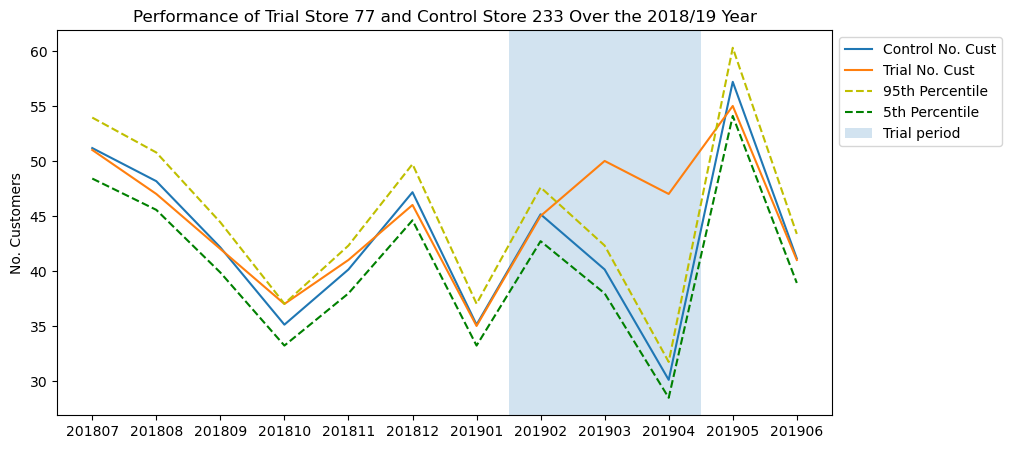

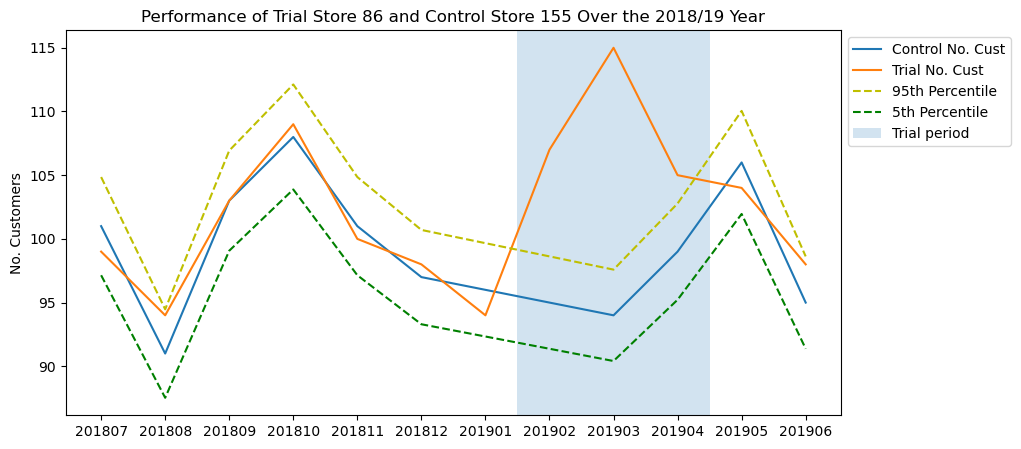

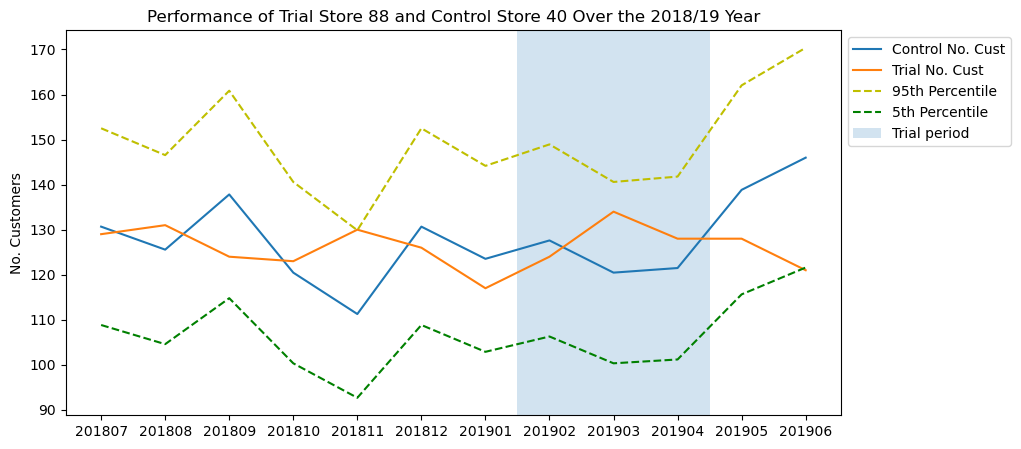

In [70]:
# Then do line graphs to show a full year's trend
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)]\
                    [['YEARMONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)]\
                    [['YEARMONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})

    ax = plot_control.plot.line(x = "YEARMONTH", y = 'control_ncust', use_index=False, label = 'Control No. Cust')
    ax_trial = plot_trial.plot.line(x = "YEARMONTH", y = 'trial_ncust', use_index=False, ax=ax, label = 'Trial No. Cust')

    # plot the thresholds as lines
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEARMONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEARMONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEARMONTH', y = 'control_ncust',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEARMONTH', y = 'control_ncust', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))

    # Other plot features
    ax.set_ylabel('No. Customers')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

### Key Insights

1. Trial Store 77 experienced a significant and sustained increase in both total sales and customer counts, indicating a strong positive impact of the trial in this location.

2. Trial Store 86 showed a positive but more variable impact on sales and customer counts, suggesting a potential benefit but requiring further analysis for consistency.

3. Trial Store 88 did not exhibit a statistically significant change in sales or customer counts, implying the trial did not have a noticeable impact on this particular store.

4. Comparing trial store performance to control stores and using thresholds was crucial for isolating the trial's effects and assessing the significance of observed changes.

5. The trial had a mixed impact across different stores, highlighting the potential influence of store-specific characteristics or customer demographics on the trial's effectiveness.

6. These insights can inform strategic decisions regarding the broader implementation of the trial, emphasizing the need for a comprehensive evaluation of both successful and unsuccessful cases.

## CONCLUSION OF TASK 2

1. Trial stores 77 and 86 demonstrated a statistically significant uplift in total sales during the trial period. This suggests that the new store layouts had a positive impact on sales performance in these locations, exceeding the performance of their respective control stores.

2. Trial store 88 did not show a statistically significant change in total sales during the trial period. This implies that the new store layout did not have a noticeable positive impact on sales in this particular store. Further investigation is needed to understand the factors contributing to this outcome.

3. The impact on customer numbers varied across the trial stores. While stores 77 and 86 saw increases in customer traffic during the trial period, store 88 did not experience a significant change. This suggests that the new layout might have influenced customer behavior differently across locations.

4. The control store selection process played a crucial role in isolating the effects of the trial. By carefully selecting and scaling control stores, the analysis was able to account for potential differences in sales patterns between the trial and control stores that were unrelated to the trial itself. This ensured a more accurate assessment of the trial's impact.

5. The overall results of the trial were mixed, with positive outcomes observed for stores 77 and 86 but not for store 88. This highlights the importance of testing new initiatives in multiple locations to capture potential variations in response and to identify factors that might influence success. Further analysis and consideration should be given to the store-specific factors that might have contributed to the varying outcomes.